In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
global_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
global_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183285,183358,183407,183445,183572,183687,183908,184038,184224,184360
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,290954,290954,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266328,266356,266392,266424,266445,266487,266542,266591,266654,266700
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,45061,45061,45061,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101320,101600,101901,101901,101901,102209,102209,102209,102209,102301


# Find rise in cases between '1/22/2020' to '04/03/2020'

In [2]:
#data cleaning
country_list = ['US', 'China', 'United Kingdom', 'Germany', 'India']



In [3]:
asked_country = global_data[global_data['Country/Region'].isin(country_list)]
asked_country

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22
59,Anhui,China,31.825700,117.226400,1,9,15,39,60,70,...,1446,1446,1462,1467,1470,1476,1480,1487,1495,1502
60,Beijing,China,40.182400,116.414200,14,22,36,41,68,80,...,3710,3710,3712,3714,3715,3719,3722,3724,3727,3729
61,Chongqing,China,30.057200,107.874000,6,9,27,57,75,110,...,756,759,759,762,762,763,764,764,769,774
62,Fujian,China,26.078900,117.987400,1,5,10,18,35,59,...,3550,3563,3570,3580,3584,3588,3594,3606,3616,3625
63,Gansu,China,35.751800,104.286100,0,2,2,4,7,14,...,737,767,798,851,880,912,959,1008,1060,1102
64,Guangdong,China,23.341700,113.424400,26,32,53,78,111,151,...,7695,7723,7748,7779,7810,7824,7861,7890,7933,7964
65,Guangxi,China,23.829800,108.788100,2,5,23,23,36,46,...,1649,1649,1649,1658,1717,1852,1873,1927,1949,1984
66,Guizhou,China,26.815400,106.874800,1,3,3,4,5,7,...,185,185,185,186,186,186,186,186,186,186
67,Hainan,China,19.195900,109.745300,4,5,8,19,22,33,...,309,316,321,325,326,326,326,326,326,326
68,Hebei,China,39.549000,116.130600,1,1,2,8,13,18,...,2007,2007,2007,2007,2007,2007,2007,2007,2007,2007


In [4]:
#now i have to sum all the columns between these two dates
start_date = 1/22/2020
end_date = 4/3/2020

In [5]:
asked_country = asked_country.drop(['Lat', 'Long'], axis =1)
asked_country.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/13/22,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22
59,Anhui,China,1,9,15,39,60,70,106,152,...,1446,1446,1462,1467,1470,1476,1480,1487,1495,1502
60,Beijing,China,14,22,36,41,68,80,91,111,...,3710,3710,3712,3714,3715,3719,3722,3724,3727,3729
61,Chongqing,China,6,9,27,57,75,110,132,147,...,756,759,759,762,762,763,764,764,769,774
62,Fujian,China,1,5,10,18,35,59,80,84,...,3550,3563,3570,3580,3584,3588,3594,3606,3616,3625
63,Gansu,China,0,2,2,4,7,14,19,24,...,737,767,798,851,880,912,959,1008,1060,1102


In [105]:
cols = list(asked_country.columns)

In [7]:
country_cases = pd.pivot_table(asked_country, values = cols[2::], index = ['Country/Region'], aggfunc = sum)
country_cases
#asked_country.groupby(['Country/Region'])

,1/1/21,1/1/22,1/10/21,1/10/22,1/11/21,1/11/22,1/12/21,1/12/22,1/13/21,1/13/22,...,9/5/20,9/5/21,9/6/20,9/6/21,9/7/20,9/7/21,9/8/20,9/8/21,9/9/20,9/9/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,102649,128132,103754,130213,103895,130497,104146,130737,104322,130977,...,94516,118172,94565,118223,94601,118255,94621,118296,94641,118321
Germany,1742661,7176814,1908527,7535691,1921024,7581381,1933826,7661811,1953426,7743228,...,248997,4005641,249985,4010390,250799,4017116,252298,4030681,253474,4046112
India,10305788,34889132,10466595,35875790,10479179,36070510,10495147,36317927,10512093,36582129,...,4113811,33027621,4204613,33058843,4280422,33096718,4370128,33139981,4465863,33174954
US,20370188,55024140,22589870,61801347,22793833,62588733,23015647,63437357,23244979,64298689,...,6261921,40137541,6291040,40231271,6315603,40440438,6342347,40617363,6375987,40783781
United Kingdom,2549671,13174530,3081319,14708454,3127617,14825809,3173273,14957778,3220936,15064277,...,346507,7010583,349499,7051461,352450,7089002,354932,7127601,357611,7165161


In [8]:
#now i can make a pivot table conatinig columns between two start dates and end dates and sum across columns
#get the index of both the dates from col list

In [9]:
country_cases.columns = country_cases.columns.str.replace('/','-')
country_cases

,1-1-21,1-1-22,1-10-21,1-10-22,1-11-21,1-11-22,1-12-21,1-12-22,1-13-21,1-13-22,...,9-5-20,9-5-21,9-6-20,9-6-21,9-7-20,9-7-21,9-8-20,9-8-21,9-9-20,9-9-21
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,102649,128132,103754,130213,103895,130497,104146,130737,104322,130977,...,94516,118172,94565,118223,94601,118255,94621,118296,94641,118321
Germany,1742661,7176814,1908527,7535691,1921024,7581381,1933826,7661811,1953426,7743228,...,248997,4005641,249985,4010390,250799,4017116,252298,4030681,253474,4046112
India,10305788,34889132,10466595,35875790,10479179,36070510,10495147,36317927,10512093,36582129,...,4113811,33027621,4204613,33058843,4280422,33096718,4370128,33139981,4465863,33174954
US,20370188,55024140,22589870,61801347,22793833,62588733,23015647,63437357,23244979,64298689,...,6261921,40137541,6291040,40231271,6315603,40440438,6342347,40617363,6375987,40783781
United Kingdom,2549671,13174530,3081319,14708454,3127617,14825809,3173273,14957778,3220936,15064277,...,346507,7010583,349499,7051461,352450,7089002,354932,7127601,357611,7165161


In [10]:
#let us convert all column name to_datetime


In [11]:
transposed_country_cases = country_cases.T
transposed_country_cases

Country/Region,China,Germany,India,US,United Kingdom
1-1-21,102649,1742661,10305788,20370188,2549671
1-1-22,128132,7176814,34889132,55024140,13174530
1-10-21,103754,1908527,10466595,22589870,3081319
1-10-22,130213,7535691,35875790,61801347,14708454
1-11-21,103895,1921024,10479179,22793833,3127617
...,...,...,...,...,...
9-7-21,118255,4017116,33096718,40440438,7089002
9-8-20,94621,252298,4370128,6342347,354932
9-8-21,118296,4030681,33139981,40617363,7127601
9-9-20,94641,253474,4465863,6375987,357611


In [12]:

transposed_country_cases.columns.name = None
transposed_country_cases = transposed_country_cases.reset_index()

In [13]:
#get index from dates

transposed_country_cases

,index,China,Germany,India,US,United Kingdom
0,1-1-21,102649,1742661,10305788,20370188,2549671
1,1-1-22,128132,7176814,34889132,55024140,13174530
2,1-10-21,103754,1908527,10466595,22589870,3081319
3,1-10-22,130213,7535691,35875790,61801347,14708454
4,1-11-21,103895,1921024,10479179,22793833,3127617
...,...,...,...,...,...,...
908,9-7-21,118255,4017116,33096718,40440438,7089002
909,9-8-20,94621,252298,4370128,6342347,354932
910,9-8-21,118296,4030681,33139981,40617363,7127601
911,9-9-20,94641,253474,4465863,6375987,357611


In [14]:
start_date = '1/22/2020'
end_date = '4/3/2020'
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
start_date

Timestamp('2020-01-22 00:00:00')

In [15]:
transposed_country_cases.dtypes


index             object
China              int64
Germany            int64
India              int64
US                 int64
United Kingdom     int64
dtype: object

In [16]:
#let us convert to datetime data
transposed_country_cases['index'] = pd.to_datetime(transposed_country_cases['index'])
transposed_country_cases

,index,China,Germany,India,US,United Kingdom
0,2021-01-01,102649,1742661,10305788,20370188,2549671
1,2022-01-01,128132,7176814,34889132,55024140,13174530
2,2021-01-10,103754,1908527,10466595,22589870,3081319
3,2022-01-10,130213,7535691,35875790,61801347,14708454
4,2021-01-11,103895,1921024,10479179,22793833,3127617
...,...,...,...,...,...,...
908,2021-09-07,118255,4017116,33096718,40440438,7089002
909,2020-09-08,94621,252298,4370128,6342347,354932
910,2021-09-08,118296,4030681,33139981,40617363,7127601
911,2020-09-09,94641,253474,4465863,6375987,357611


In [17]:
transposed_country_cases.dtypes

index             datetime64[ns]
China                      int64
Germany                    int64
India                      int64
US                         int64
United Kingdom             int64
dtype: object

In [18]:
#let us augment data with a day_difference columns, also changing the name of column from index to date
transposed_country_cases = transposed_country_cases.rename(columns = {'index':'dates'})
transposed_country_cases

,dates,China,Germany,India,US,United Kingdom
0,2021-01-01,102649,1742661,10305788,20370188,2549671
1,2022-01-01,128132,7176814,34889132,55024140,13174530
2,2021-01-10,103754,1908527,10466595,22589870,3081319
3,2022-01-10,130213,7535691,35875790,61801347,14708454
4,2021-01-11,103895,1921024,10479179,22793833,3127617
...,...,...,...,...,...,...
908,2021-09-07,118255,4017116,33096718,40440438,7089002
909,2020-09-08,94621,252298,4370128,6342347,354932
910,2021-09-08,118296,4030681,33139981,40617363,7127601
911,2020-09-09,94641,253474,4465863,6375987,357611


In [19]:
start_date

Timestamp('2020-01-22 00:00:00')

In [20]:
end_date

Timestamp('2020-04-03 00:00:00')

In [21]:
transposed_country_cases = transposed_country_cases.sort_values(by = 'dates').reset_index(drop = True)
transposed_country_cases

,dates,China,Germany,India,US,United Kingdom
0,2020-01-22,548,0,0,1,0
1,2020-01-23,643,0,0,1,0
2,2020-01-24,920,0,0,2,0
3,2020-01-25,1406,0,0,2,0
4,2020-01-26,2075,0,0,5,0
...,...,...,...,...,...,...
908,2022-07-18,2195056,29853680,43783062,89712243,23282749
909,2022-07-19,2198945,29994679,43801678,89830497,23282749
910,2022-07-20,2203789,30131303,43824728,90046261,23421534
911,2022-07-21,2209013,30239122,43847065,90200438,23421574


In [63]:
def num_of_days(date):
    return (date - transposed_country_cases.loc[0, 'dates'])

In [64]:
transposed_country_cases['day_difference'] = transposed_country_cases['dates'].apply(lambda x: num_of_days(x))
transposed_country_cases

,dates,China,Germany,India,US,United Kingdom,day_difference
0,2020-01-22,548,0,0,1,0,0 days
1,2020-01-23,643,0,0,1,0,1 days
2,2020-01-24,920,0,0,2,0,2 days
3,2020-01-25,1406,0,0,2,0,3 days
4,2020-01-26,2075,0,0,5,0,4 days
...,...,...,...,...,...,...,...
908,2022-07-18,2195056,29853680,43783062,89712243,23282749,908 days
909,2022-07-19,2198945,29994679,43801678,89830497,23282749,909 days
910,2022-07-20,2203789,30131303,43824728,90046261,23421534,910 days
911,2022-07-21,2209013,30239122,43847065,90200438,23421574,911 days


In [33]:
start_date

Timestamp('2020-01-22 00:00:00')

In [34]:
end_date

Timestamp('2020-04-03 00:00:00')

In [36]:
diff = end_date-start_date
diff

Timedelta('72 days 00:00:00')

In [69]:
cases = transposed_country_cases.loc[0:72]
cases

,dates,China,Germany,India,US,United Kingdom,day_difference
0,2020-01-22,548,0,0,1,0,0 days
1,2020-01-23,643,0,0,1,0,1 days
2,2020-01-24,920,0,0,2,0,2 days
3,2020-01-25,1406,0,0,2,0,3 days
4,2020-01-26,2075,0,0,5,0,4 days
...,...,...,...,...,...,...,...
68,2020-03-30,82139,57298,1251,165698,34251,68 days
69,2020-03-31,83786,61913,1397,192079,38788,69 days
70,2020-04-01,84002,67366,1998,223254,43755,70 days
71,2020-04-02,84129,73522,2543,255530,48694,71 days


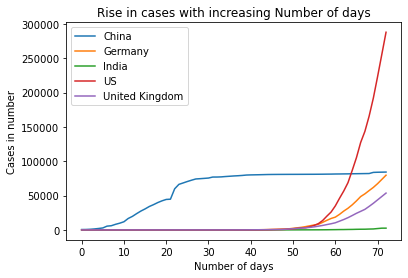

In [104]:
x_values = list(cases.index)
country_to_plot = list(cases.columns[1:-1])
for country in country_to_plot:
    y_values = cases[country]
    plt.plot(x_values, y_values,label = country)
xmark = cases['dates']
plt.title('Rise in cases with increasing Number of days')
plt.xlabel('Number of days')
plt.ylabel('Cases in number')
plt.legend()
plt.show()


In [ ]:
#now convert x_axis to dates

In [107]:
cols = list(asked_country.columns)
cols

['Province/State',
 'Country/Region',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20',
 '2/1/20',
 '2/2/20',
 '2/3/20',
 '2/4/20',
 '2/5/20',
 '2/6/20',
 '2/7/20',
 '2/8/20',
 '2/9/20',
 '2/10/20',
 '2/11/20',
 '2/12/20',
 '2/13/20',
 '2/14/20',
 '2/15/20',
 '2/16/20',
 '2/17/20',
 '2/18/20',
 '2/19/20',
 '2/20/20',
 '2/21/20',
 '2/22/20',
 '2/23/20',
 '2/24/20',
 '2/25/20',
 '2/26/20',
 '2/27/20',
 '2/28/20',
 '2/29/20',
 '3/1/20',
 '3/2/20',
 '3/3/20',
 '3/4/20',
 '3/5/20',
 '3/6/20',
 '3/7/20',
 '3/8/20',
 '3/9/20',
 '3/10/20',
 '3/11/20',
 '3/12/20',
 '3/13/20',
 '3/14/20',
 '3/15/20',
 '3/16/20',
 '3/17/20',
 '3/18/20',
 '3/19/20',
 '3/20/20',
 '3/21/20',
 '3/22/20',
 '3/23/20',
 '3/24/20',
 '3/25/20',
 '3/26/20',
 '3/27/20',
 '3/28/20',
 '3/29/20',
 '3/30/20',
 '3/31/20',
 '4/1/20',
 '4/2/20',
 '4/3/20',
 '4/4/20',
 '4/5/20',
 '4/6/20',
 '4/7/20',
 '4/8/20',
 '4/9/20',
 '4/10/20',
 '4/11/20',
 '4/12/20',
 '4/1

In [110]:
new_x_vals = cols[2:75]

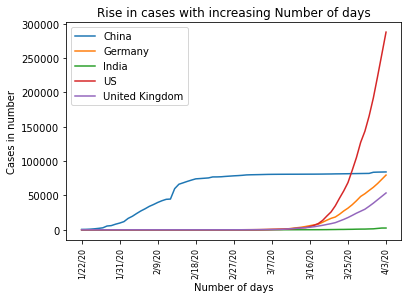

In [116]:
new_x_vals = cols[2:75]
country_to_plot = list(cases.columns[1:-1])
for country in country_to_plot:
    y_values = cases[country]
    plt.plot(new_x_vals, y_values,label = country)
plt.title('Rise in cases with increasing Number of days')
gap = max((len(new_x_vals))//8,1)
plt.xticks(new_x_vals[::gap], rotation = 'vertical', size = 8)
plt.xlabel('Number of days')
plt.ylabel('Cases in number')
plt.legend()
plt.show()